# 1. Setup

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
# Update repo
!git pull

In [ ]:
!cd yolov5

In [ ]:
%pip install -qr requirements.txt  # install requirement

In [11]:
import torch
import utils
import os
display = utils.notebook_init()  # checks
cwd = os.getcwd()
cwd

YOLOv5  v7.0-140-g1db9533 Python-3.10.6 torch-2.0.0+cpu CPU


Setup complete  (8 CPUs, 7.8 GB RAM, 215.7/231.6 GB disk)


'c:\\Users\\Admin\\Projects\\Random_Project\\ID\\yolov5'

## Download segmentation models

In [ ]:
from utils.downloads import attempt_download
p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

## Download models

In [ ]:
from utils.downloads import attempt_download
p5 = ['n', 's', 'm', 'l', 'x']  # P5 models

for x in p5:
    attempt_download(f'weights/yolov5{x}.pt')

# 2. Detect (Inference)

## 2.1. Using detect.py

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source   0                               # webcam
                            img.jpg                         # image 
                            vid.mp4                         # video
                            screen                          # screenshot
                            path/                           # directory
                            'path/*.jpg'                    # glob
                            'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                            'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
!python detect.py --weights yolov5x6.pt --img-size 640 --conf 0.25 --source data/images/bus.jpg
#conf : confident threshold

In [6]:
!python detect.py --weights ./weights/yolov5s.onnx --source data/images/bus.jpg --view-img --nosave

detect: weights=['./weights/yolov5s.onnx'], source=data/images/bus.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=True, save_txt=False, save_conf=False, save_crop=False, nosave=True, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-140-g1db9533 Python-3.10.6 torch-2.0.0+cpu CPU

Loading weights\yolov5s.onnx for ONNX Runtime inference...
image 1/1 C:\Users\Admin\Projects\Random_Project\ID\yolov5\data\images\bus.jpg: 640x640 4 persons, 1 bus, 143.5ms
Speed: 26.1ms pre-process, 143.5ms inference, 54.8ms NMS per image at shape (1, 3, 640, 640)


In [ ]:
# display.Image(filename='runs/detect/exp/zidane.jpg', width=600)
display.Image(filename='runs/detect/exp8/ETE4.jpg', width=600)

## 2.2 Using Pytorch hub
Cloning https://github.com/ultralytics/yolov5 is not required

In [ ]:
# Download (if not available) and load model from Github
model = torch.hub.load("ultralytics/yolov5", "yolov5s",force_reload=True)
                                         # or yolov5n - yolov5x6, custom

In [ ]:
#Models can be transferred to any device after creation:
device=torch.device(0)
device
# model.cpu()  # CPU
# model.cuda()  # GPU
# model.to(device)  # i.e. device=torch.device(0)

In [ ]:
# Models can also be created directly on any device
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', device='cpu')  # load on CPU

In [ ]:
# Load model from local path
localModel = torch.hub.load(cwd, 'custom', source='local', path = 'yolov5n.pt')

In [ ]:
# Set confidence threshold
localModel.conf = 50

YOLOv5 models contain various inference attributes such as confidence threshold, IoU threshold, etc. which can be set by:
```shell
localModel.conf = 0.25  # NMS confidence threshold
           iou = 0.45  # NMS IoU threshold
           agnostic = False  # NMS class-agnostic
           multi_label = False  # NMS multiple labels per box
           classes = None  # (optional list) filter by class, i.e. = [0, 15, 16] for COCO persons, cats and dogs
           max_det = 1000  # maximum number of detections per image
           amp = False  # Automatic Mixed Precision (AMP) inference
```

In [ ]:
from PIL import ImageGrab
img = ImageGrab.grab()  # take a screenshot

In [ ]:
#Load Images from internet
img = "https://ultralytics.com/images/zidane.jpg"  # or file, Path, PIL, OpenCV, numpy, list

In [ ]:
#Load Images from local file path
img = './data/images/ETE4.jpg'

In [ ]:
# Inference
results = localModel(img, size = 320)

# Results
# results.pandas().xyxy[0]
results.show()  # print() or .show(), .save(), .crop(), .pandas(), etc.

## 2.3 Using ultralystics library

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov5su.pt')

In [ ]:
img = './data/images/ETE4.jpg'
# results = model(img)
# model.predict(source=img, show=True)
model.predict(source=img)

# 3. Segmentation

## Using predict.py

`segment/predict.py` runs YOLOv5 instance segmentation inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/predict`. Example inference sources are:

```shell
python segment/predict.py --source  0                               # webcam
                                    img.jpg                         # image 
                                    vid.mp4                         # video
                                    screen                          # screenshot
                                    path/                           # directory
                                    'path/*.jpg'                    # glob
                                    'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                                    'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [16]:
!python segment/predict.py --weights ./weights/segment/yolov5s-seg.pt --source data/images/ETE4.jpg --save-crop --exist-ok --retina-masks

segment\predict: weights=['./weights/segment/yolov5s-seg.pt'], source=data/images/ETE4.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\predict-seg, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=True
YOLOv5  v7.0-140-g1db9533 Python-3.10.6 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 C:\Users\Admin\Projects\Random_Project\ID\yolov5\data\images\ETE4.jpg: 320x640 4 persons, 1 bench, 246.5ms
Speed: 2.0ms pre-process, 246.5ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\predict-seg\exp


In [7]:
!python segment/predict.py --weights ./weights/segment/yolov5s-seg.onnx --source data/images/animals.jpg --view-img --project ./output

segment\predict: weights=['./weights/segment/yolov5s-seg.onnx'], source=data/images/animals.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=True, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=./output, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5  v7.0-140-g1db9533 Python-3.10.6 torch-2.0.0+cpu CPU

Loading weights\segment\yolov5s-seg.onnx for ONNX Runtime inference...
image 1/1 C:\Users\Admin\Projects\Random_Project\ID\yolov5\data\images\animals.jpg: 640x640 4 birds, 1 cat, 1 dog, 1 cow, 9 bears, 1 zebra, 1 giraffe, 192.4ms
Speed: 1.9ms pre-process, 192.4ms inference, 4.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to output\exp2


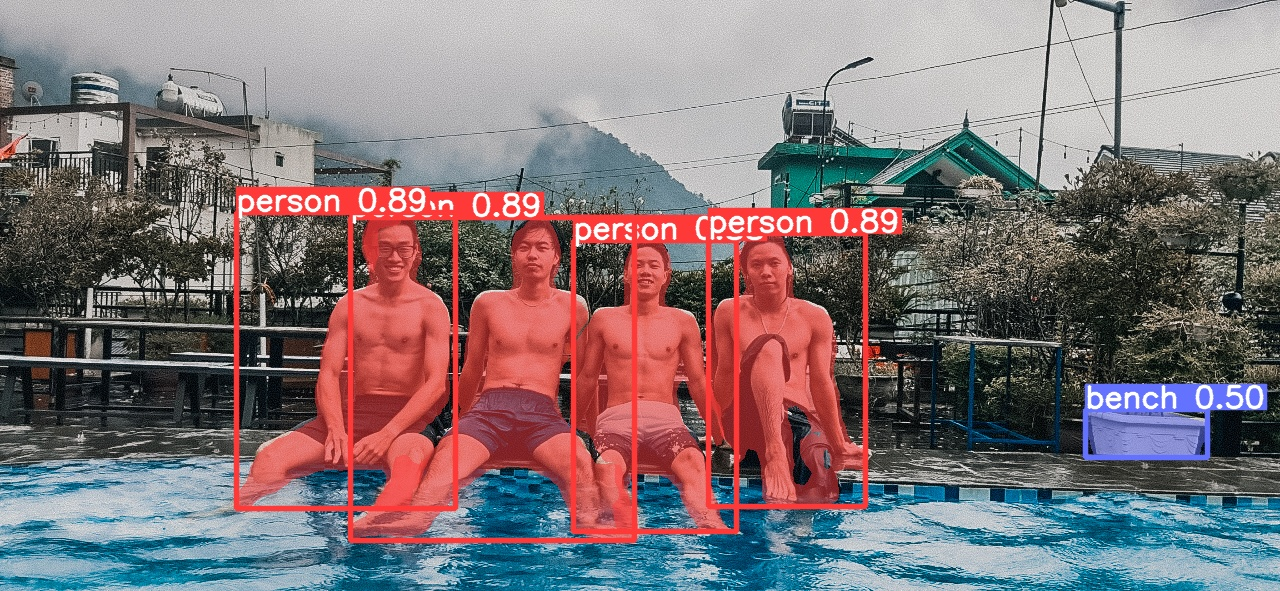

In [17]:
display.Image(filename='runs/predict-seg/exp/ETE4.jpg', width=600)

# 4. Training

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

In [ ]:
!python train.py --img 640 --batch 8 --epochs 1 --data coco128.yaml --weights './runs/train/exp/weights/best.pt' --cache

# 5. Validate

In [ ]:
# Download COCO datasets
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)

In [ ]:
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip
# linux command, unusable, mannually extract file fo ./datasets

In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco128.yaml --img 640 --half

# 6.Roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="xZyDKhFbLnK8HTbvU8RE")
project = rf.workspace("phxgt").project("phxgt-xuorj")
dataset = project.version(1).download("yolov5")

In [ ]:
dataset.location

In [ ]:
!python segment/train.py --img 640 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt
display.Image(filename=f'runs/train-seg/exp/results.png', width=1200)

In [ ]:
# infer on a local image
# print(model.predict("./data/images/bus.jpg", confidence=40, overlap=30).json())

# visualize your prediction
model.predict("mask.jpg", confidence=40, overlap=30).save("./runs/prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

# 7. Export

## 7.1 export to onnx

In [ ]:
#using cuda
!python export.py --weights ./weights/yolov5s-seg.pt --include onnx engine --img 640 --device 0

In [8]:
#using cpu
!python export.py --weights ./weights/yolov5s.pt --include onnx engine --img 640 --device cpu

============== Diagnostic Run torch.onnx.export version 2.0.0+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



export: data=C:\Users\Admin\Projects\Random_Project\ID\yolov5\data\coco128.yaml, weights=['./weights/yolov5s.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx', 'engine']
YOLOv5  v7.0-140-g1db9533 Python-3.10.6 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients

PyTorch: starting from weights\yolov5s.pt with output shape (1, 25200, 85) (14.1 MB)
TensorRT: export failure  0.0s: export running on CPU but must be on GPU, i.e. `python export.py --device 0`

ONNX: starting export with onnx 1.13.1...
ONNX: export success  1.5s, saved as weights\yolov5s.onnx (28.0 MB)

Export complete (2.5s)
Results saved to C:\Users\Admin\Projects\Random_Project\ID\yolov5\weights
Detect:          python detect.py --weig

In [ ]:
#dynamic
!python export.py --weights ./weights/segment/yolov5s-seg.pt --include onnx --dynamic

In [ ]:
#simplify model
!python export.py --weights ./weights/yolov5n-seg.pt --include onnx --simplify

In [4]:
!python export.py --weights ./weights/segment/yolov5s-seg.pt --include onnx --data ./data/coco128-seg.yaml

============== Diagnostic Run torch.onnx.export version 2.0.0+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



export: data=./data/coco128-seg.yaml, weights=['./weights/segment/yolov5s-seg.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5  v7.0-140-g1db9533 Python-3.10.6 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs

PyTorch: starting from weights\segment\yolov5s-seg.pt with output shape (1, 25200, 117) (14.9 MB)

ONNX: starting export with onnx 1.13.1...
ONNX: export success  2.7s, saved as weights\segment\yolov5s-seg.onnx (29.5 MB)

Export complete (4.2s)
Results saved to C:\Users\Admin\Projects\Random_Project\ID\yolov5\weights\segment
Detect:          python segment\predict.py --weights weights\segment\yolov5s-seg.onnx 
Validate:        python segment\val.py --weights

In [ ]:
!python export.py --weights ./weights/segment/yolov5s-seg.pt --include onnx --dynamic --data ./data/coco128-seg.yaml

## 7.2 Export to torchscript

In [5]:
!python export.py --weights ./weights/segment/yolov5s-seg.pt --include torchscript --data ./data/coco128-seg.yaml

export: data=./data/coco128-seg.yaml, weights=['./weights/segment/yolov5s-seg.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5  v7.0-140-g1db9533 Python-3.10.6 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs

PyTorch: starting from weights\segment\yolov5s-seg.pt with output shape (1, 25200, 117) (14.9 MB)

TorchScript: starting export with torch 2.0.0+cpu...
TorchScript: export success  3.5s, saved as weights\segment\yolov5s-seg.torchscript (29.5 MB)

Export complete (4.6s)
Results saved to C:\Users\Admin\Projects\Random_Project\ID\yolov5\weights\segment
Detect:          python segment\predict.py --weights weights\segment\yolov5s-seg.torchscript 
Validate:

In [3]:
!python export.py --weights ./weights/segment/yolov5s-seg-idcard-best.pt --include torchscript --data ./PHXGT-1/data.yaml

export: data=./PHXGT-1/data.yaml, weights=['./weights/segment/yolov5s-seg-idcard-best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5  v7.0-140-g1db9533 Python-3.10.6 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 165 layers, 7411907 parameters, 0 gradients, 25.7 GFLOPs

PyTorch: starting from weights\segment\yolov5s-seg-idcard-best.pt with output shape (1, 25200, 43) (14.5 MB)

TorchScript: starting export with torch 2.0.0+cpu...
TorchScript: export success  3.2s, saved as weights\segment\yolov5s-seg-idcard-best.torchscript (28.8 MB)

Export complete (4.2s)
Results saved to C:\Users\Admin\Projects\Random_Project\ID\yolov5\weights\segment
Detect:          python segment\predict.py --weights weights\segment\yolov5s-s

In [7]:
!python segment/predict.py --weights ./weights/segment/pnnx/yolov5s-seg-idcard-best.torchscript --source data/images/cmnd5.jpg --view-img

segment\predict: weights=['./weights/segment/pnnx/yolov5s-seg-idcard-best.torchscript'], source=data/images/cmnd5.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=True, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5  v7.0-140-g1db9533 Python-3.10.6 torch-2.0.0+cpu CPU

Loading weights\segment\pnnx\yolov5s-seg-idcard-best.torchscript for TorchScript inference...
image 1/1 C:\Users\Admin\Projects\Random_Project\ID\yolov5\data\images\cmnd5.jpg: 640x640 2 cmt9_fronts, 798.7ms
Speed: 20.0ms pre-process, 798.7ms inference, 22.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\predict-seg\exp2


# 8. Convert Model

## 8.1 Convert from onnx to ncnn via ncnn tool

In [ ]:
# Optional : simplify onnx model
!onnxsim ./weights/segment/yolov5s-seg.onnx yolov5n-seg-sim.onnx

In [5]:
!onnx2ncnn ./weights/yolov5s.onnx yolov5s-seg.param yolov5s-seg.bin

## 8.2 Convert from Torchscript to ncnn via pnnx

```
Usage: pnnx [model.pt] [(key=value)...]
  pnnxparam=model.pnnx.param
  pnnxbin=model.pnnx.bin
  pnnxpy=model_pnnx.py
  pnnxonnx=model.pnnx.onnx
  ncnnparam=model.ncnn.param
  ncnnbin=model.ncnn.bin
  ncnnpy=model_ncnn.py
  fp16=1
  optlevel=2
  device=cpu/gpu
  inputshape=[1,3,224,224],...
  inputshape2=[1,3,320,320],...
  customop=/home/nihui/.cache/torch_extensions/fused/fused.so,...
  moduleop=models.common.Focus,models.yolo.Detect,...
Sample usage: pnnx mobilenet_v2.pt inputshape=[1,3,224,224]
              pnnx yolov5s.pt inputshape=[1,3,640,640] inputshape2=[1,3,320,320] device=gpu moduleop=models.common.Focus,models.yolo.Detect
```

Parameters:

`pnnxparam` (default="*.pnnx.param", * is the model name): PNNX graph definition file

`pnnxbin` (default="*.pnnx.bin"): PNNX model weight

`pnnxpy` (default="*_pnnx.py"): PyTorch script for inference, including model construction and weight initialization code

`pnnxonnx` (default="*.pnnx.onnx"): PNNX model in onnx format

`ncnnparam` (default="*.ncnn.param"): ncnn graph definition

`ncnnbin` (default="*.ncnn.bin"): ncnn model weight

`ncnnpy` (default="*_ncnn.py"): pyncnn script for inference

`fp16` (default=1): save ncnn weight and onnx in fp16 data type

`optlevel` (default=2): graph optimization level 

| Option | Optimization level              |
|--------|---------------------------------|
|   0    | do not apply optimization       |
|   1    | optimization for inference      |
|   2    | optimization more for inference |

`device` (default="cpu"): device type for the input in TorchScript model, cpu or gpu

`inputshape` (Optional): shapes of model inputs. It is used to resolve tensor shapes in model graph. for example, `[1,3,224,224]` for the model with only 1 input, `[1,3,224,224],[1,3,224,224]` for the model that have 2 inputs.

`inputshape2` (Optional): shapes of alternative model inputs, the format is identical to `inputshape`. Usually, it is used with `inputshape` to resolve dynamic shape (-1) in model graph.

`customop` (Optional): list of Torch extensions (dynamic library) for custom operators, separated by ",". For example, `/home/nihui/.cache/torch_extensions/fused/fused.so,...`

`moduleop` (Optional): list of modules to keep as one big operator, separated by ",". for example, `models.common.Focus,models.yolo.Detect`

In [4]:
!pnnx ./weights/segment/pnnx/yolov5s-seg-idcard-best.torchscript inputshape=[1,3,640,640]

pnnxparam = ./weights/segment/pnnx/yolov5s-seg-idcard-best.pnnx.param
pnnxbin = ./weights/segment/pnnx/yolov5s-seg-idcard-best.pnnx.bin
pnnxpy = ./weights/segment/pnnx/yolov5s-seg-idcard-best_pnnx.py
pnnxonnx = ./weights/segment/pnnx/yolov5s-seg-idcard-best.pnnx.onnx
ncnnparam = ./weights/segment/pnnx/yolov5s-seg-idcard-best.ncnn.param
ncnnbin = ./weights/segment/pnnx/yolov5s-seg-idcard-best.ncnn.bin
ncnnpy = ./weights/segment/pnnx/yolov5s-seg-idcard-best_ncnn.py
fp16 = 1
optlevel = 2
device = cpu
inputshape = [1,3,640,640]f32
inputshape2 = 
customop = 
moduleop = 
############# pass_level0
inline module = models.common.Bottleneck
inline module = models.common.C3
inline module = models.common.Concat
inline module = models.common.Conv
inline module = models.common.Proto
inline module = models.common.SPPF
inline module = models.yolo.Segment
inline module = models.common.Bottleneck
inline module = models.common.C3
inline module = models.common.Concat
inline module = models.common.Conv
inl

In [8]:
!pnnx ./weights/segment/pnnx/yolov5s-seg.torchscript inputshape=[1,3,640,640]

pnnxparam = ./weights/segment/pnnx/yolov5s-seg.pnnx.param
pnnxbin = ./weights/segment/pnnx/yolov5s-seg.pnnx.bin
pnnxpy = ./weights/segment/pnnx/yolov5s-seg_pnnx.py
pnnxonnx = ./weights/segment/pnnx/yolov5s-seg.pnnx.onnx
ncnnparam = ./weights/segment/pnnx/yolov5s-seg.ncnn.param
ncnnbin = ./weights/segment/pnnx/yolov5s-seg.ncnn.bin
ncnnpy = ./weights/segment/pnnx/yolov5s-seg_ncnn.py
fp16 = 1
optlevel = 2
device = cpu
inputshape = [1,3,640,640]f32
inputshape2 = 
customop = 
moduleop = 
############# pass_level0
inline module = models.common.Bottleneck
inline module = models.common.C3
inline module = models.common.Concat
inline module = models.common.Conv
inline module = models.common.Proto
inline module = models.common.SPPF
inline module = models.yolo.Segment
inline module = models.common.Bottleneck
inline module = models.common.C3
inline module = models.common.Concat
inline module = models.common.Conv
inline module = models.common.Proto
inline module = models.common.SPPF
inline module = 